#Time series analysis of Airline Passengers

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('AirPassengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The column 'Month' containes dates with the format (YYYY-MM). The data starts in 1949
The second column '#Passengers' contains the number of passengers for the month

In [7]:
#Rename columns
df.rename(columns={'Month':'Date','#Passengers':'Passengers'},inplace=True)

In [8]:
df.columns.tolist()

['Date', 'Passengers']

In [9]:
#conver the date column format from YYYY-MM to dateline
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m')

In [10]:
df.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Note
The date conversion process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data

#Data visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of passengers')

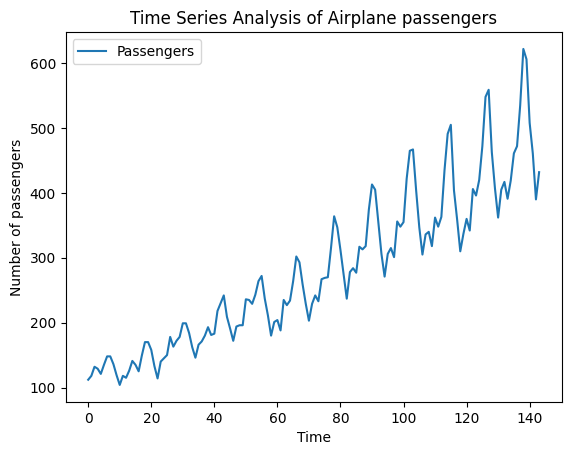

In [12]:
#Generating a lineplot
sns.lineplot(df)

plt.title("Time Series Analysis of Airplane passengers")
plt.xlabel('Time')
plt.ylabel("Number of passengers")

#Checking for stationarity
This refers to the manner in which time series data changes is constant. A stationaity time series will not have any trends or seasonal pattern

In [14]:
from statsmodels.tsa.stattools import adfuller
#Using ADF test method to check for stationarity
result=adfuller(df['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value:{result[1]}')
print(f'Critical Values:')
for key,value in result[4].items():
    print(f' {key}: {value}')



ADF Statistic: 0.8153688792060482
p-value:0.991880243437641
Critical Values:
 1%: -3.4816817173418295
 5%: -2.8840418343195267
 10%: -2.578770059171598


#Autocorrelationhis is a measure of how correlated time series data is at a given point in time with past values. If our passenger datat has strong autocorrelation, we can assume that high passenger numbers today, suggest a strong likelihood that they will be high tomorrow as well

In [16]:
autocorrelation_lag1=df['Passengers'].autocorr(lag=1)
print('One Month Lag:',autocorrelation_lag1)

One Month Lag: 0.9601946480498522


In [17]:
#for month 3,6 and 9
autocorrelation_lag3=df['Passengers'].autocorr(lag=3)
print("Three Month Lag:",autocorrelation_lag3)

autocorrelation_lag6=df['Passengers'].autocorr(lag=6)
print("Three Month Lag:",autocorrelation_lag6)

autocorrelation_lag9=df['Passengers'].autocorr(lag=9)
print("Three Month Lag:",autocorrelation_lag9)


Three Month Lag: 0.837394765081794
Three Month Lag: 0.7839187959206183
Three Month Lag: 0.8278519011167602


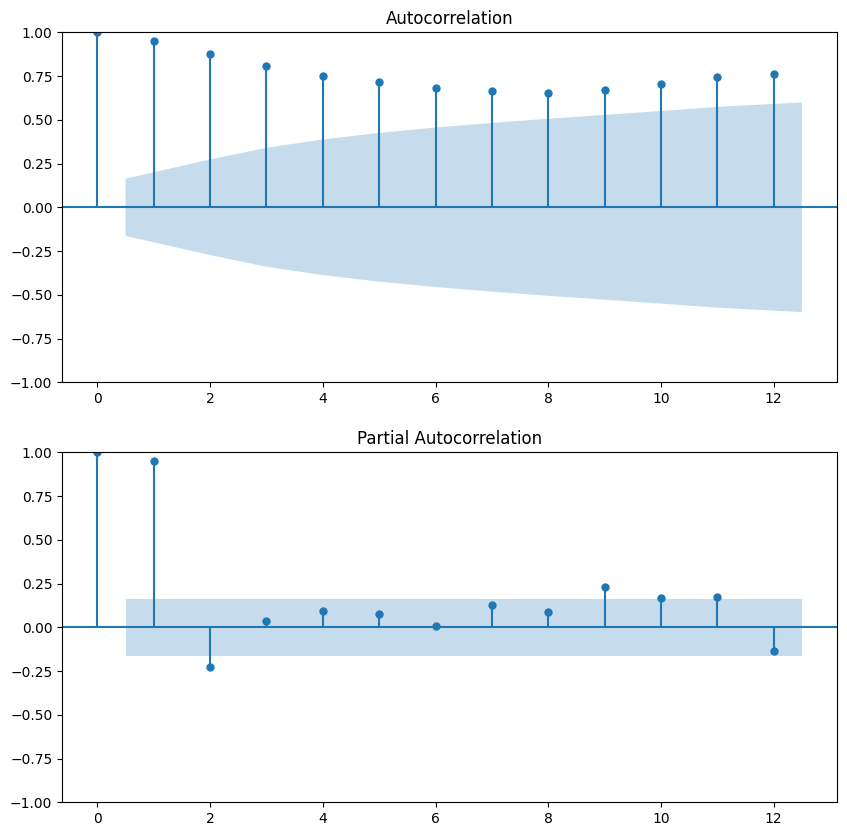

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Plotting ACF & PCF
plt.figure(figsize=(10,10))
plt.subplot(211)
plot_acf(df['Passengers'],lags=12,ax=plt.gca())
plt.subplot(212)
plot_pacf(df['Passengers'],lags=12,ax=plt.gca())

plt.show()

#Decomposition
We use 'seasonal_decompose' from the statistics model to decompose the time series data into its seasonal, trend and residual components.
The additive model was used since the seasonal variation is relatively constant over time. If the seasonal variation changes over time, the multiplicative model is used.


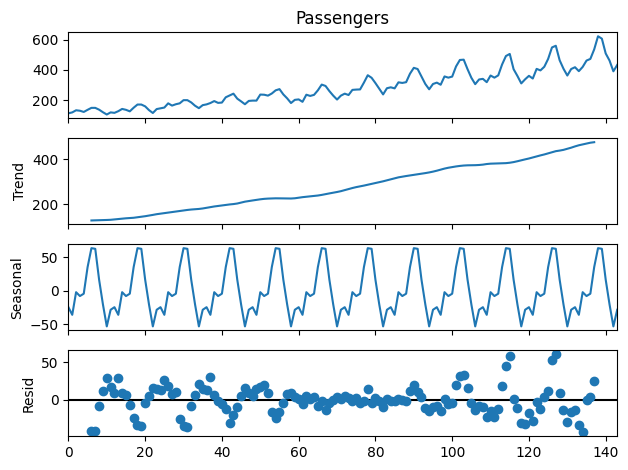

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

#perfoming seasonal decomposition
decompose=seasonal_decompose(df['Passengers'],model='additive',period=12)
decompose.plot()
plt.show()

#Interpretation:

Analyzing and understanding the decomposition plot involves interpreting the indivual components.

    1.Trend
The trend component represents the underlying long-term behavior or direction of the time series data.

    It shows the overall pattern.

    Shows any sustained upward or downward movements.

If the trend is consistently increasing or decreasing, it suggests a clear upward or downward trend in the data. if the trend is flat, it indicates that there is no significant long-term trend present.

    2.Seasonal
The seasonal component represents the repetitive patterns or fluctutation that occur at fixed intervals.

    It shows the regular and predictable variations in the data that repeat over each seasonal period.

    In the decompostion plot, the seasonal component is usually represented by a series of peaks and valleys.
Seasonality refers to patterns that occur within a fixed freuency i.e daily, monthly or annual cycles. Understanding patterns can aid in prediction of future cycles and identifying any season-specific effects.

    3.Residual
The residual component, also known as the remainder or error term represnets the random or unpredictable fluctutations in the data that are not accounted for by the trend and seasonal components.

    It contains the noise or unexplained variation.

    In the decomposition plot, the residual component is depcited as random fluctuations around zero.

    Analyzing the residual component helps assess the quality of the decomposition.
    
If the residuals exhibit a random pattern without any discernible trends or seasonality, it indicates that the decompostion is capturing most of the systematic variation in the data. Otherwise, if the residuals show patterns, it suggests that there might be additional patterns or factors not captured by the model.

Conclusion
Trend: Upward trend.
Seasonality: rise and fall in values each year.